# Обучение модели

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2013,Pune,3,27,Male,No,5,0
1,Bachelors,2016,Pune,2,24,Female,No,2,1
2,Bachelors,2013,Pune,3,32,Male,No,2,0
3,PHD,2016,Bangalore,3,30,Female,No,5,0
4,Bachelors,2013,Bangalore,3,25,Male,No,3,0


In [4]:
label_encoder = LabelEncoder()

for column in train_df.columns:
    if train_df[column].dtype == 'object':
        train_df[column] = label_encoder.fit_transform(train_df[column])

In [5]:
train_df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2013,2,3,27,1,0,5,0
1,0,2016,2,2,24,0,0,2,1
2,0,2013,2,3,32,1,0,2,0
3,2,2016,0,3,30,0,0,5,0
4,0,2013,0,3,25,1,0,3,0


In [6]:
X, y = train_df.drop(['LeaveOrNot'], axis=1).to_numpy(), train_df['LeaveOrNot'].to_numpy()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

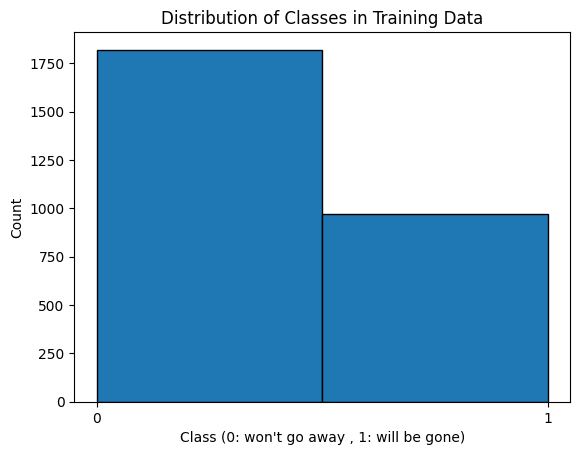

In [23]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: won\'t go away , 1: will be gone)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [48]:
# create model instance
#bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

model = XGBClassifier()

# Определение сетки параметров для поиска оптимальных значений
param_grid = {
    'n_estimators': [50, 100, 500],
    'max_depth': [3, 4, 5, 7],
    'learning_rate': [0.1, 0.01, 1]
}

# Подбор оптимальных параметров с помощью кросс-валидации
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Вывод наилучших параметров и точности модели
print("Наилучшие параметры:", grid_search.best_params_)
print("Лучшая точность:", grid_search.best_score_)

# fit model
#bst.fit(X_train, y_train)

# make predictions
xg_pred = grid_search.predict(X_test)

xg_roc_auc = roc_auc_score(y_test, xg_pred)
xg_accuracy = accuracy_score(y_test, xg_pred.round())
xg_precision = precision_score(y_test, xg_pred.round())
xg_recall = recall_score(y_test, xg_pred.round())

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {xg_roc_auc:.2f}")
print(f"Accuracy: {xg_accuracy:.2f}")
print(f"Precision: {xg_precision:.2f}")
print(f"Recall: {xg_recall:.2f}")

In [ ]:
# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(learning_rate=0.00998, max_depth=7, n_estimators=400, min_samples_leaf=2, min_samples_split=5)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict_proba(X_test)[:,1]

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred.round())
gb_precision = precision_score(y_test, gb_pred.round())
gb_recall = recall_score(y_test, gb_pred.round())

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

In [8]:
tree = DecisionTreeClassifier()

In [16]:
tree.fit(X, y)

DecisionTreeClassifier()

<bound method ClassifierMixin.score of DecisionTreeClassifier()>

# Submission

In [32]:
test_df = pd.read_csv('test.csv')

In [33]:
for column in test_df.columns:
    if test_df[column].dtype == 'object':
        test_df[column] = label_encoder.fit_transform(test_df[column])

In [39]:
pred = grid_search.predict(test_df.to_numpy())

In [40]:
d = pd.DataFrame({'ID': list(range(len(pred))), 'LeaveOrNot': pred})
d.to_csv('submission.csv', index=False)

In [30]:
roc_auc = roc_auc_score(y_test, pred)
accuracy = accuracy_score(y_test, pred.round())
precision = precision_score(y_test, pred.round())
recall = recall_score(y_test, pred.round())

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

ValueError: Found input variables with inconsistent numbers of samples: [698, 1164]